In [1]:
#current working directory:
import os
os.getcwd()

'/home/ftp'

In [3]:
from platform import python_version

print(python_version())

3.9.6


In [ ]:
# EDA packages

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #plot package
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords


In [27]:
#load the csv file
data = pd.read_csv('Sample_dataset.csv')

In [ ]:
#Understanding the data

In [11]:
data.dropna()

,REGION,WOREDA,KEBELE,unique_ID,A2_LAT,A2_LON,age,sex,Land_measurement (ha),Percentage of land (%)
0,Oromia,Deder,Obi Lamata,1121252,9.336216,41.403308,38,Female,0.159,100
1,Oromia,Deder,Obi Lamata,1121254,9.318726,41.378943,33,Male,0.370,80
2,Oromia,Deder,Obi Lamata,1121256,9.332073,41.382834,30,Female,0.098,100
3,Oromia,Deder,Obi Lamata,1121258,9.332480,41.390893,38,Male,0.080,60
4,Oromia,Deder,Gogwisa,1121266,9.158377,41.479508,40,Female,0.037,75
...,...,...,...,...,...,...,...,...,...,...
770,Oromia,Sire,ufuraagamsa,11111113110,8.349724,39.526393,50,Male,0.140,100
771,Oromia,Sire,ufuraagamsa,11111113116,8.348510,39.513112,27,Male,0.230,80
772,Oromia,Sire,ufuraagamsa,11111113122,8.375818,39.554494,22,Female,0.125,100
773,Oromia,Sire,ufuraagamsa,11111113128,8.349599,39.526512,23,Male,0.120,100


In [6]:
data.tail(8)

,REGION,WOREDA,KEBELE,unique_ID,A2_LAT,A2_LON,age,sex,Land_measurement (ha),Percentage of land (%)
767,Oromia,Siraro,bilanchaalamaan,11101101386,7.078895,38.172030,38,Male,0.65,75
768,Oromia,Sire,hugisoboreno,11111112104,8.229723,39.569796,45,Female,0.23,85
769,Oromia,Sire,ufuraagamsa,11111113105,8.348198,39.512957,28,Female,0.027,85
770,Oromia,Sire,ufuraagamsa,11111113110,8.349724,39.526393,50,Male,0.14,100
771,Oromia,Sire,ufuraagamsa,11111113116,8.34851,39.513112,27,Male,0.23,80
772,Oromia,Sire,ufuraagamsa,11111113122,8.375818,39.554494,22,Female,0.125,100
773,Oromia,Sire,ufuraagamsa,11111113128,8.349599,39.526512,23,Male,0.12,100
774,Oromia,Sire,ufuraagamsa,11111113134,8.3513,39.513283,38,Female,0.12,100


In [7]:
data.shape

(775, 10)

In [8]:
data.describe()

,unique_ID,A2_LON,age,Percentage of land (%)
count,7.750000e+02,775.000000,775.000000,775.000000
mean,3.656036e+08,39.532398,43.015484,93.952258
std,1.639623e+09,1.342016,13.139473,15.338272
min,1.121252e+06,38.010288,18.000000,10.000000
25%,1.136382e+07,38.523690,35.000000,100.000000
50%,1.171753e+07,38.905171,40.000000,100.000000
75%,2.212177e+07,41.351717,50.000000,100.000000
max,1.111111e+10,42.255677,120.000000,130.000000


In [9]:
data.columns


Index(['REGION', 'WOREDA', 'KEBELE', 'unique_ID', 'A2_LAT', 'A2_LON', 'age',
       'sex', 'Land_measurement (ha)', 'Percentage of land (%)'],
      dtype='object')

In [10]:
data.nunique()

REGION                      2
WOREDA                     13
KEBELE                     44
unique_ID                 765
A2_LAT                    765
A2_LON                    768
age                        62
sex                         2
Land_measurement (ha)     369
Percentage of land (%)     19
dtype: int64

In [11]:
data['age'].unique()

array([ 38,  33,  30,  40,  35,  28,  34,  32,  50,  36,  66,  45,  60,
        47,  42,  44,  95,  41,  37,  62,  24,  61,  59,  80,  43,  55,
        48,  26,  56,  75,  53,  70,  21,  85,  65, 105,  22,  31,  52,
        39,  29,  25,  63,  64,  67,  46,  51,  68,  54,  27,  84,  18,
        57,  72,  20,  23,  58, 120,  90,  49,  76,  19], dtype=int64)

In [12]:
data['Land_measurement (ha)'].unique()

array([0.159, 0.37, 0.098, 0.08, 0.037, 0.61, 0.21, 0.334, 0.568, 0.125,
       0.226, 0.05, 0.12, 0.203, 0.081, 0.144, 0.112, 0.216, 0.133, 0.15,
       0.46, 0.25, 0.375, 0.798, 0.75, 0.188, 0.2, 0.22, 0.025, 0.423,
       0.219, 0.256, 0.329, 0.65, 0.214, 0.5, 0.23, 0.205, 0.673, 1,
       0.275, 0.512, 0.45, 0.416, 0.145, 0.397, 0.628, 0.32, 0.3, 0.11,
       0.385, 0.213, 1.5, 0.477, 0.826, 0.362, 0.176, 0.28, 0.4, 0.409,
       0.078, 0.143, 0.474, 0.39, 0.056, 0.98, 0.14, 0.115, 0.036, 1.1,
       0.31, 0.43, 0.33, 0.093, 0.251, 0.062, 0.076, 0.439, 0.242, 0.094,
       0.18, 0.212, 0.065, 0.017, 0.077, 0.041, 0.511, 0.349, 0.695, 1.25,
       5, 0.522, 0.68, 0.753, 0.666, 0.436, 0.273, 0.215, 0.255, 0.012,
       0.475, 0.671, 0.363, 0.058, 0.79, 0.85, 0.63, 0.042, nan, 0.086,
       0.1, 0.44, 0.158, 0.66, 0.057, 0.074, 0.06, 0.297, 0.316, 0.157,
       0.015, 0.228, 0.04, 0.502, 0.799, 0.048, 0.56, 0.91, 3, 0.52,
       0.693, 0.26, 0.111, 0.595, 4, 0.099, 0.045, 0.147, 0.061

In [14]:
data['KEBELE'].unique()

array(['Obi Lamata', 'Gogwisa', 'Dawe', 'Boku Walda', 'Caffe  Waltaha',
       'Ifa bas', 'Waldaya  Misoma', "Dagaya   Bal'oo", 'Kerensa',
       'Negaya midga', 'Edo Gigessa', 'Ali?wayo', 'Gorbi Areba',
       'Rafu Hergissa', 'Anshokela Hiro', 'Mutu Binsho', 'Fende Ejersa',
       'Alge Rima', 'Lebu Subuka', 'Sedecha Kemale', 'Walilalti',
       'Beshira Chefa', 'Sembero', 'Sengo', 'Chefe Burkitu', 'Hallo',
       'Bochessa', 'golbaaluto', 'Naka', 'werjawashigula', 'Dujuma',
       'Mudianano', 'Erer Ebada', 'Sondi', 'Kortu', 'Ayalegumgum',
       'Hululmojo', 'kubidimtuu', 'alelugesela', 'hugisoboreno',
       'awashbishola', 'korodegaga', 'bilanchaalamaan', 'ufuraagamsa'],
      dtype=object)

In [ ]:
#cleaning the data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REGION                  775 non-null    object 
 1   WOREDA                  775 non-null    object 
 2   KEBELE                  775 non-null    object 
 3   unique_ID               775 non-null    int64  
 4   A2_LAT                  775 non-null    object 
 5   A2_LON                  775 non-null    float64
 6   age                     775 non-null    int64  
 7   sex                     773 non-null    object 
 8   Land_measurement (ha)   772 non-null    object 
 9   Percentage of land (%)  775 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 60.7+ KB


In [15]:
print(data.isnull().sum())

REGION                    0
WOREDA                    0
KEBELE                    0
unique_ID                 0
A2_LAT                    0
A2_LON                    0
age                       0
sex                       2
Land_measurement (ha)     3
Percentage of land (%)    0
dtype: int64

In [19]:
updated_data = data.dropna()

In [20]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 774
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REGION                  770 non-null    object 
 1   WOREDA                  770 non-null    object 
 2   KEBELE                  770 non-null    object 
 3   unique_ID               770 non-null    int64  
 4   A2_LAT                  770 non-null    object 
 5   A2_LON                  770 non-null    float64
 6   age                     770 non-null    int64  
 7   sex                     770 non-null    object 
 8   Land_measurement (ha)   770 non-null    object 
 9   Percentage of land (%)  770 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 66.2+ KB


In [12]:
#print(data.to_string())

In [30]:
data.shape

(775, 10)

In [13]:
data.isna()

,REGION,WOREDA,KEBELE,unique_ID,A2_LAT,A2_LON,age,sex,Land_measurement (ha),Percentage of land (%)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
770,False,False,False,False,False,False,False,False,False,False
771,False,False,False,False,False,False,False,False,False,False
772,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False


In [32]:
data.dropna(axis='index' , how='any')

,REGION,WOREDA,KEBELE,unique_ID,A2_LAT,A2_LON,age,sex,Land_measurement (ha),Percentage of land (%)
0,Oromia,Deder,Obi Lamata,1121252,9.336216,41.403308,38,Female,0.159,100
1,Oromia,Deder,Obi Lamata,1121254,9.318726,41.378943,33,Male,0.37,80
2,Oromia,Deder,Obi Lamata,1121256,9.332073,41.382834,30,Female,0.098,100
3,Oromia,Deder,Obi Lamata,1121258,9.33248,41.390893,38,Male,0.08,60
4,Oromia,Deder,Gogwisa,1121266,9.158377,41.479508,40,Female,0.037,75
...,...,...,...,...,...,...,...,...,...,...
770,Oromia,Sire,ufuraagamsa,11111113110,8.349724,39.526393,50,Male,0.14,100
771,Oromia,Sire,ufuraagamsa,11111113116,8.34851,39.513112,27,Male,0.23,80
772,Oromia,Sire,ufuraagamsa,11111113122,8.375818,39.554494,22,Female,0.125,100
773,Oromia,Sire,ufuraagamsa,11111113128,8.349599,39.526512,23,Male,0.12,100


In [34]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
770    False
771    False
772    False
773    False
774    False
Length: 775, dtype: bool

In [ ]:
#relationship analysis

In [39]:
corelation = data.corr()

<AxesSubplot:>

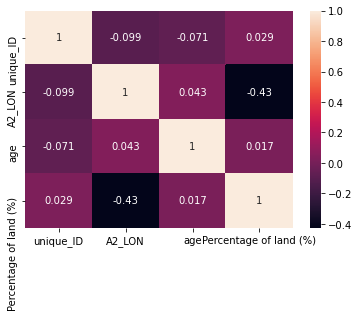

In [40]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
           ,annot=True)

In [ ]:
#The most frequently used words

In [53]:
#To build a wordcloud, we have to remove NULL values first:
data["WOREDA"] = data["WOREDA"].fillna(value="")

In [54]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(data['WOREDA'].str.lower())
#word_string

(-0.5, 1599.5, 799.5, -0.5)

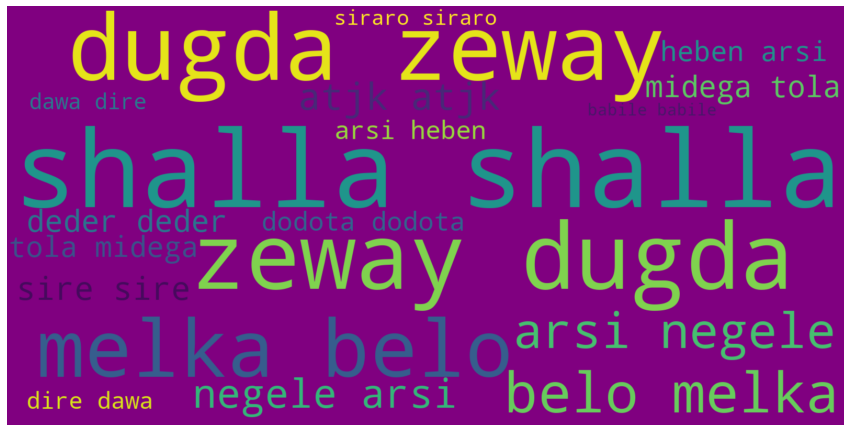

In [55]:
#And - plotting:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

c:\users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


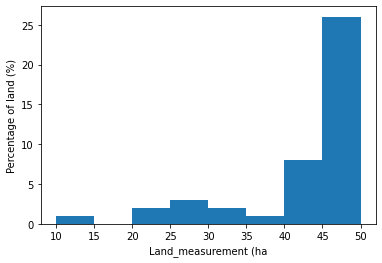

In [59]:
#Comments distribution plot:
fig, ax = plt.subplots()
_ = sns.distplot(data[data["Percentage of land (%)"] < 60]["Percentage of land (%)"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Land_measurement (ha", ylabel="id")
plt.ylabel("Percentage of land (%)")
plt.xlabel("Land_measurement (ha")
plt.show()

In [61]:
#Make new variable cpu
data['multiplied_column'] = data['Land_measurement (ha)'] * data['Percentage of land (%)']

In [63]:
data['multiplied_column']

0       15.9
1       29.6
2        9.8
3        4.8
4      2.775
       ...  
770     14.0
771     18.4
772     12.5
773     12.0
774     12.0
Name: multiplied_column, Length: 775, dtype: object

In [64]:
data.head(5)

,REGION,WOREDA,KEBELE,unique_ID,A2_LAT,A2_LON,age,sex,Land_measurement (ha),Percentage of land (%),multiplied_column
0,Oromia,Deder,Obi Lamata,1121252,9.336216,41.403308,38,Female,0.159,100,15.9
1,Oromia,Deder,Obi Lamata,1121254,9.318726,41.378943,33,Male,0.37,80,29.6
2,Oromia,Deder,Obi Lamata,1121256,9.332073,41.382834,30,Female,0.098,100,9.8
3,Oromia,Deder,Obi Lamata,1121258,9.33248,41.390893,38,Male,0.08,60,4.8
4,Oromia,Deder,Gogwisa,1121266,9.158377,41.479508,40,Female,0.037,75,2.775


In [ ]:
""""""End""""""